In [16]:
# Import Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Get swing state data 
df_swing = pd.read_csv('https://assets.datacamp.com/production/repositories/469/datasets/e079fddb581197780e1a7b7af2aeeff7242535f0/2008_swing_states.csv')

In [8]:
df_swing.head()

,state,county,total_votes,dem_votes,rep_votes,dem_share
0,PA,Erie County,127691,75775,50351,60.08
1,PA,Bradford County,25787,10306,15057,40.64
2,PA,Tioga County,17984,6390,11326,36.07
3,PA,McKean County,15947,6465,9224,41.21
4,PA,Potter County,7507,2300,5109,31.04


array([[<AxesSubplot:title={'center':'dem_share'}>]], dtype=object)

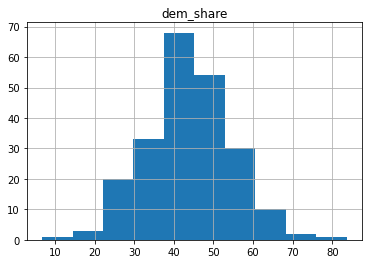

In [9]:
df_swing[['state','county','dem_share']].hist()

<AxesSubplot:>

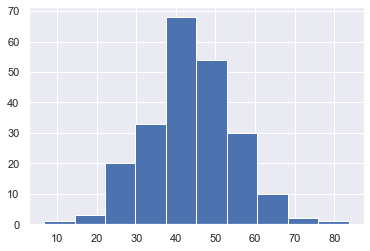

In [10]:
sns.set()
df_swing.dem_share.hist()

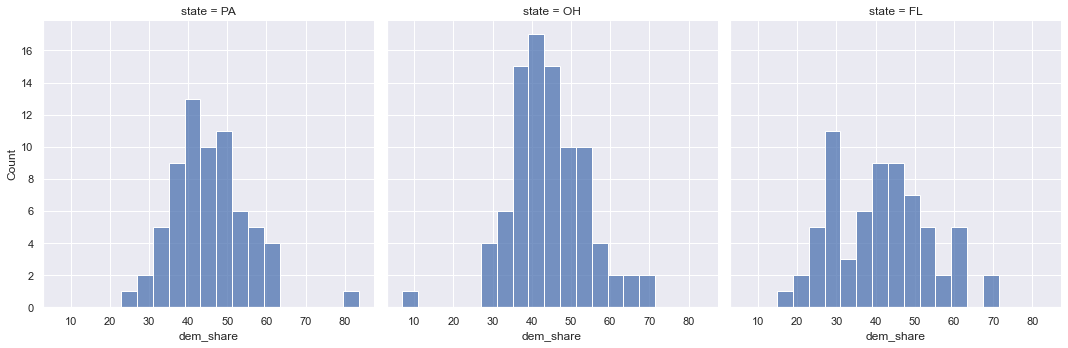

In [28]:
sns.displot(x='dem_share', col='state',data=df_swing)

Text(0, 0.5, 'percent of vote for Obama')

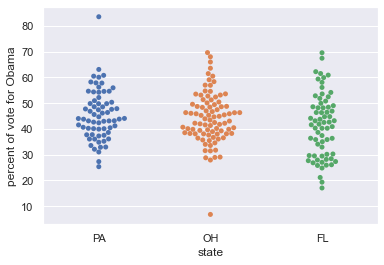

In [15]:
# To avoid "binning bias" we can plot the same data using a bee swarm plot

sns.swarmplot(x='state', y='dem_share', data=df_swing)
plt.xlabel('state')
plt.ylabel('percent of vote for Obama')

## Plot values using an ECDF

In [22]:
# Create a function to calculate ECDF given a column series
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, len(x)+1) / n

    return x, y    

### 'Dem share' ECDF

In [23]:
# create the x and y values to plot
#x = np.sort(df_swing['dem_share'])
#y = np.arange(1, len(x)+1) / len(x)
x, y = ecdf(df_swing['dem_share'])

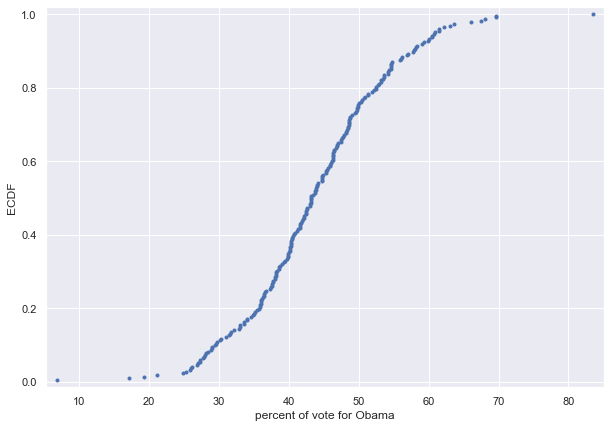

In [24]:
fig, ax = plt.subplots(figsize=(10,7))
plt.plot(x, y, marker='.', linestyle='none')
# label the axes!!
plt.xlabel('percent of vote for Obama')
plt.ylabel('ECDF')
plt.margins(0.02)  # Keeps data off the plot edges

## Quantitative Summary Statistics

In [29]:
np.mean(df_swing.dem_share)

43.76441441441444

In [39]:
# Calculate the percentiles and plot on ECDF graph
# Create percentiles array
percentiles = [2.5,25,50,75,97.5]
# Calculate the percentiles of the dem_share
ptiles_demshare = np.percentile(df_swing.dem_share, percentiles)

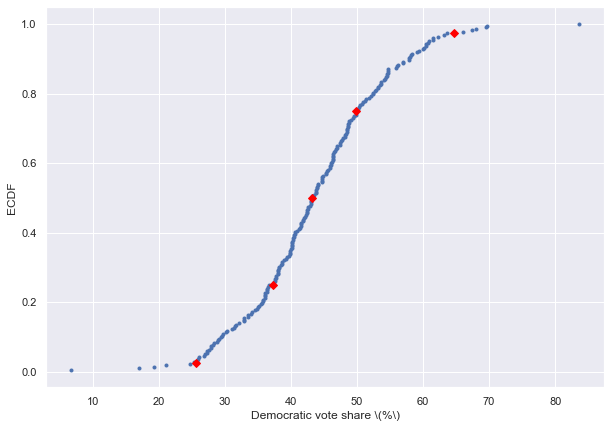

In [48]:
#Plot both on a single graph to visualize the percentiles

# Create a scaled version of percentiles list by dividing by 100
perct_asfrac = [x/100 for x in percentiles]
# Plot the ECDF
fig, ax = plt.subplots(figsize=(10,7))
plt.plot(x, y, '.')
plt.xlabel('Democratic vote share \(%\)')
plt.ylabel('ECDF')

# Overlay percentiles as red diamonds.
plt.plot(ptiles_demshare, perct_asfrac, marker='D', color='red',
         linestyle='none')

In [49]:
# Print out the values of the ptiles_demshare array
print(f" ptiles_demshare array values: {ptiles_demshare}")

 ptiles_demshare array values: [25.58675 37.3025  43.185   49.925   64.7195 ]


<AxesSubplot:xlabel='state', ylabel='dem_share'>

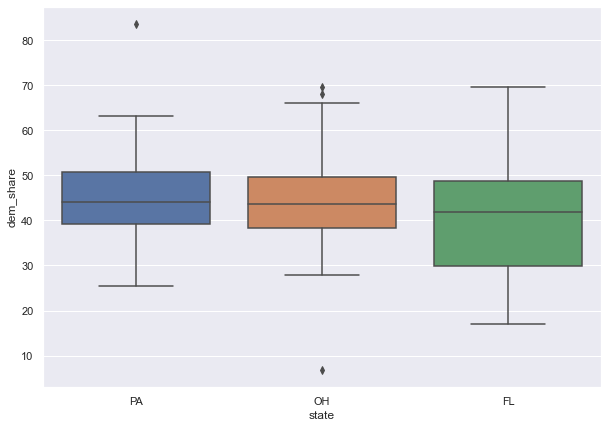

In [50]:
fig, ax = plt.subplots(figsize=(10,7))
sns.boxplot(x='state', y='dem_share', data=df_swing)

## Investigate some correlations

In [53]:
df_swing.head()

,state,county,total_votes,dem_votes,rep_votes,dem_share
0,PA,Erie County,127691,75775,50351,60.08
1,PA,Bradford County,25787,10306,15057,40.64
2,PA,Tioga County,17984,6390,11326,36.07
3,PA,McKean County,15947,6465,9224,41.21
4,PA,Potter County,7507,2300,5109,31.04


<AxesSubplot:xlabel='total_votes', ylabel='dem_share'>

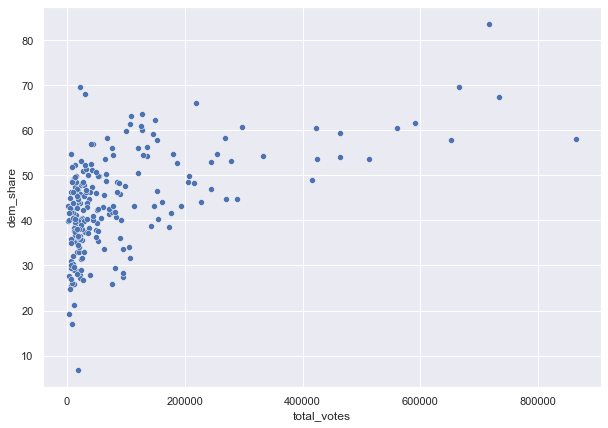

In [55]:
fig, ax = plt.subplots(figsize=(10,7))
sns.scatterplot(x='total_votes', y='dem_share',data=df_swing)

In [56]:
# Create a function to calculate the Pearson's Correlation Coefficient
def pearson_r(x,y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x,y)
    
    # Return entry [0,1]
    return corr_mat[0,1]

In [58]:
r = pearson_r(df_swing.total_votes, df_swing.dem_share)
r

0.536197364958678